<div><h2>Лабораторная работа №6 по дисциплине «Методы машинного обучения»</h2>
  по теме: "Ансамбли моделей машинного обучения"

  Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("iris.csv", sep=",")

In [22]:
from sklearn.model_selection import train_test_split
data=data.dropna(axis=0,how='any')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [0]:
Y = data.drop(data.columns[[0,1,2,3]],axis="columns")
X = data.drop(data.columns[[4]],axis="columns")
#768
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score


class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.tar1 = []
    self.tar2 = []
  def training(self):
    self._method.fit(self.x_train,self.y_train)
    self.tar1 = self._method.predict(self.x_train)
    self.tar2 = self._method.predict(self.x_test)
  def result(self,metric):
    print(metric(self.y_train,self.tar1)*10)
    print(metric(self.y_test,self.tar2)*10)
  def result_er(self,metric):
    print(metric(self.y_train,self.tar1))
    print(metric(self.y_test,self.tar2))
    
                                                    # metric(self.y_test,self.tar2)))


Ансамблевые методы — это парадигма машинного обучения, где несколько моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов. Основная гипотеза состоит в том, что при правильном сочетании слабых моделей мы можем получить более точные и/или надежные модели.

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
data = pd.read_csv("iris.csv", sep=",",header=None,names=["x","y","z","w","fl"])
data.fl.replace({"Iris-setosa":'1',"Iris-versicolor":'2',"Iris-virginica":'3'},inplace=True)
Y = data.drop(data.columns[[0,1,2,3]],axis="columns")
X = data.drop(data.columns[[4]],axis="columns")
#768
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

RFC - Случайный лес - это метаоценщик, который соответствует ряду классификаторов дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и переопределения контроля.

In [26]:
rfc=Classifier(RandomForestClassifier(max_features=0.2),data_x_train,data_y_train,data_x_test,data_y_test)
rfc.training()
rfc.result_er(mean_squared_error)

0.016666666666666666
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


GBC - Классификатор повышения градиента является аддитивным ансамблем базовой модели, ошибка которого исправляется в последовательных итерациях (или этапах) путем добавления деревьев регрессии, которые исправляют невязки (ошибка предыдущего этапа).

In [27]:
gbc=Classifier(GradientBoostingClassifier(max_features=0.7),data_x_train,data_y_train,data_x_test,data_y_test)
gbc.training()
gbc.result_er(mean_squared_error)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0
0.0


<h1> Подбор гиперпараметра К</h1>
​
RFC

In [28]:
n_range = np.array(range(1,11,1))
n_range = n_range/10
tp=[{'max_features':n_range}]
tp

[{'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [0]:
rfcgscv = GridSearchCV(RandomForestClassifier(),tp,cv=6,scoring='accuracy')
rfcgscv.fit(data_x_train,data_y_train)

In [30]:
rfcgscv.best_params_

{'max_features': 0.2}

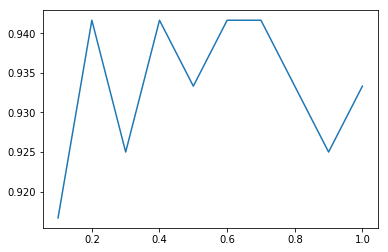

In [31]:
plt.plot(n_range,rfcgscv.cv_results_['mean_test_score'])

GBC

In [32]:
n_range = np.array(range(1,11,1))
n_range = n_range/10
tp=[{'max_features':n_range}]
tp

[{'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}]

In [0]:
gbcgscv = GridSearchCV(GradientBoostingClassifier(),tp,cv=5,scoring='accuracy')
gbcgscv.fit(data_x_train,data_y_train)

In [34]:
gbcgscv.best_params_

{'max_features': 0.1}

&nbsp;

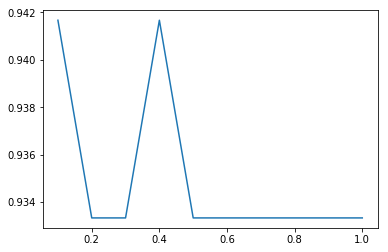

In [35]:
print(plt.plot(n_range,gbcgscv.cv_results_['mean_test_score']))
print("")

&nbsp;
# <div>Сравнение случайного параметра с полученным наилучшим </div>
Сравним резулультаты моделей с использованием случайных фитч и с их результатами при использовании найденных оптимальных

In [36]:
rfc.result_er(mean_squared_error)
print("vs")
rfc2=Classifier(RandomForestClassifier(max_features=3),data_x_train,data_y_train,data_x_test,data_y_test)
rfc2.training()
rfc2.result_er(mean_squared_error)


0.016666666666666666
0.0
vs
0.008333333333333333
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [42]:
gbc.result_er(mean_squared_error)
print("vs")
gbc2=Classifier(GradientBoostingClassifier(max_features=2),data_x_train,data_y_train,data_x_test,data_y_test)
gbc2.training()
gbc2.result_er(mean_squared_error)

0.0
0.0
vs
0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
